In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
biomass_data = pd.read_csv('site_data.csv')

In [3]:
# Transpose the DataFrame to have products as rows and locations as columns
data_transposed = biomass_data.set_index(['dataset', 'site_name', 'site_id', 'X', 'Y']).T

In [4]:
data_transposed

dataset                    NEON                                             \
site_name        Harvard Forest Smithsonian Conservation Biology Institute   
site_id                    HARV                                       SCBI   
X                   -72.172660                                 -78.139500    
Y                     42.536900                                  38.892920   
ESA CCI                     NaN                                        NaN   
Chopping et al.             NaN                                        NaN   
GEDI L4B             164.080719                                 334.279755   
Liu et al.            37.921211                                 115.212837   
LT-GNN                      NaN                                        NaN   
Menlove & Healey     114.922806                                 106.782768   
Xu et al.                   NaN                                        NaN   

dataset                                                                        \
site_name        Ordway-Swisher Biological Station Guanica Forest      UNDERC   
site_id                                       OSBS           GUAN        UNDE   
X                                      -81.993430     -66.868700  -89.537250    
Y                                        29.689270      17.969550   46.233880   
ESA CCI                                        NaN            NaN         NaN   
Chopping et al.                                NaN            NaN         NaN   
GEDI L4B                                 63.379155            NaN  155.069643   
Liu et al.                               69.890287            NaN  139.331772   
LT-GNN                                         NaN            NaN         NaN   
Menlove & Healey                         42.734001            NaN   91.699257   
Xu et al.                                      NaN            NaN         NaN   

dataset                                                        \
site_name        Konza Prairie Biological Station   Oak Ridge   
site_id                                      KONZ        ORNL   
X                                     -96.563090  -84.282600    
Y                                       39.100770   35.964120   
ESA CCI                                       NaN         NaN   
Chopping et al.                               NaN         NaN   
GEDI L4B                                 7.477551  162.482702   
Liu et al.                              10.838812   91.845345   
LT-GNN                                        NaN         NaN   
Menlove & Healey                        10.135107  115.705890   
Xu et al.                                     NaN         NaN   

dataset                                                 \
site_name        Talladega National Forest   Woodworth   
site_id                               TALL        WOOD   
X                              -87.393270  -99.241356    
Y                                32.950460   47.128228   
ESA CCI                                NaN         NaN   
Chopping et al.                        NaN         NaN   
GEDI L4B                        228.355491    4.161302   
Liu et al.                       85.784576    9.719982   
LT-GNN                                 NaN         NaN   
Menlove & Healey                125.903267    0.000000   
Xu et al.                              NaN         NaN   

dataset                                             ...  \
site_name        Central Plains Experimental Range  ...   
site_id                                       CPER  ...   
X                                      -104.745602  ...   
Y                                        40.815534  ...   
ESA CCI                                        NaN  ...   
Chopping et al.                           0.000000  ...   
GEDI L4B                                  1.268689  ...   
Liu et al.                                9.621728  ...   
LT-GNN                                         NaN  ...   
Menlove & Healey      

In [7]:
# Remove non-numeric rows
data_transposed_numeric = data_transposed.select_dtypes(include=[np.number])

In [8]:
data_transposed_numeric

dataset                    NEON                                             \
site_name        Harvard Forest Smithsonian Conservation Biology Institute   
site_id                    HARV                                       SCBI   
X                   -72.172660                                 -78.139500    
Y                     42.536900                                  38.892920   
ESA CCI                     NaN                                        NaN   
Chopping et al.             NaN                                        NaN   
GEDI L4B             164.080719                                 334.279755   
Liu et al.            37.921211                                 115.212837   
LT-GNN                      NaN                                        NaN   
Menlove & Healey     114.922806                                 106.782768   
Xu et al.                   NaN                                        NaN   

dataset                                                                        \
site_name        Ordway-Swisher Biological Station Guanica Forest      UNDERC   
site_id                                       OSBS           GUAN        UNDE   
X                                      -81.993430     -66.868700  -89.537250    
Y                                        29.689270      17.969550   46.233880   
ESA CCI                                        NaN            NaN         NaN   
Chopping et al.                                NaN            NaN         NaN   
GEDI L4B                                 63.379155            NaN  155.069643   
Liu et al.                               69.890287            NaN  139.331772   
LT-GNN                                         NaN            NaN         NaN   
Menlove & Healey                         42.734001            NaN   91.699257   
Xu et al.                                      NaN            NaN         NaN   

dataset                                                        \
site_name        Konza Prairie Biological Station   Oak Ridge   
site_id                                      KONZ        ORNL   
X                                     -96.563090  -84.282600    
Y                                       39.100770   35.964120   
ESA CCI                                       NaN         NaN   
Chopping et al.                               NaN         NaN   
GEDI L4B                                 7.477551  162.482702   
Liu et al.                              10.838812   91.845345   
LT-GNN                                        NaN         NaN   
Menlove & Healey                        10.135107  115.705890   
Xu et al.                                     NaN         NaN   

dataset                                                 \
site_name        Talladega National Forest   Woodworth   
site_id                               TALL        WOOD   
X                              -87.393270  -99.241356    
Y                                32.950460   47.128228   
ESA CCI                                NaN         NaN   
Chopping et al.                        NaN         NaN   
GEDI L4B                        228.355491    4.161302   
Liu et al.                       85.784576    9.719982   
LT-GNN                                 NaN         NaN   
Menlove & Healey                125.903267    0.000000   
Xu et al.                              NaN         NaN   

dataset                                             ...  \
site_name        Central Plains Experimental Range  ...   
site_id                                       CPER  ...   
X                                      -104.745602  ...   
Y                                        40.815534  ...   
ESA CCI                                        NaN  ...   
Chopping et al.                           0.000000  ...   
GEDI L4B                                  1.268689  ...   
Liu et al.                                9.621728  ...   
LT-GNN                                         NaN  ...   
Menlove & Healey      

In [14]:
# Replace 'NA' with NaN
data_transposed_numeric = data_transposed_numeric.replace('NA', np.nan)

# Drop columns with all NaN values
data_transposed_numeric = data_transposed_numeric.dropna(axis=1, how='all')

# Impute missing values with column mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data_imputed = data_transposed_numeric.fillna(data_transposed_numeric.mean())

In [15]:
data_imputed

dataset                    NEON                                             \
site_name        Harvard Forest Smithsonian Conservation Biology Institute   
site_id                    HARV                                       SCBI   
X                   -72.172660                                 -78.139500    
Y                     42.536900                                  38.892920   
ESA CCI              105.641579                                 185.425120   
Chopping et al.      105.641579                                 185.425120   
GEDI L4B             164.080719                                 334.279755   
Liu et al.            37.921211                                 115.212837   
LT-GNN               105.641579                                 185.425120   
Menlove & Healey     114.922806                                 106.782768   
Xu et al.            105.641579                                 185.425120   

dataset                                                         \
site_name        Ordway-Swisher Biological Station      UNDERC   
site_id                                       OSBS        UNDE   
X                                      -81.993430  -89.537250    
Y                                        29.689270   46.233880   
ESA CCI                                  58.667814  128.700224   
Chopping et al.                          58.667814  128.700224   
GEDI L4B                                 63.379155  155.069643   
Liu et al.                               69.890287  139.331772   
LT-GNN                                   58.667814  128.700224   
Menlove & Healey                         42.734001   91.699257   
Xu et al.                                58.667814  128.700224   

dataset                                                        \
site_name        Konza Prairie Biological Station   Oak Ridge   
site_id                                      KONZ        ORNL   
X                                     -96.563090  -84.282600    
Y                                       39.100770   35.964120   
ESA CCI                                  9.483823  123.344645   
Chopping et al.                          9.483823  123.344645   
GEDI L4B                                 7.477551  162.482702   
Liu et al.                              10.838812   91.845345   
LT-GNN                                   9.483823  123.344645   
Menlove & Healey                        10.135107  115.705890   
Xu et al.                                9.483823  123.344645   

dataset                                                 \
site_name        Talladega National Forest   Woodworth   
site_id                               TALL        WOOD   
X                              -87.393270  -99.241356    
Y                                32.950460   47.128228   
ESA CCI                         146.681112    4.627095   
Chopping et al.                 146.681112    4.627095   
GEDI L4B                        228.355491    4.161302   
Liu et al.                       85.784576    9.719982   
LT-GNN                          146.681112    4.627095   
Menlove & Healey                125.903267    0.000000   
Xu et al.                       146.681112    4.627095   

dataset                                                                    \
site_name        Central Plains Experimental Range LBJ National Grassland   
site_id                                       CPER                   CLBJ   
X                                      -104.745602            -97.570000    
Y                                        40.815534              33.401230   
ESA CCI                                   2.178083              11.107530   
Chopping et al.                           0.000000              11.107530   
GEDI L4B                                  1.268689              17.868778   
Liu et al.                                9.621728              11.764260   
LT-GNN                                    2.178083              11.107530   
Menlove & Healey      

In [17]:
# Perform hierarchical clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed.T)

# You may need to adjust the number of clusters based on your data and analysis goals
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = cluster.fit_predict(data_scaled)

# Add cluster labels to the transposed DataFrame
data_transposed_numeric.loc['cluster'] = clusters

# Transpose the data back to the original format
biomass_data_clustered = data_transposed_numeric.T.reset_index()

In [18]:
biomass_data_clustered

,dataset,site_name,site_id,X,Y,ESA CCI,Chopping et al.,GEDI L4B,Liu et al.,LT-GNN,Menlove & Healey,Xu et al.,cluster
0,NEON,Harvard Forest,HARV,-72.17266,42.53690,NaN,NaN,164.080719,37.921211,NaN,114.922806,NaN,1.0
1,NEON,Smithsonian Conservation Biology Institute,SCBI,-78.13950,38.89292,NaN,NaN,334.279755,115.212837,NaN,106.782768,NaN,1.0
2,NEON,Ordway-Swisher Biological Station,OSBS,-81.99343,29.68927,NaN,NaN,63.379155,69.890287,NaN,42.734001,NaN,0.0
3,NEON,UNDERC,UNDE,-89.53725,46.23388,NaN,NaN,155.069643,139.331772,NaN,91.699257,NaN,1.0
4,NEON,Konza Prairie Biological Station,KONZ,-96.56309,39.10077,NaN,NaN,7.477551,10.838812,NaN,10.135107,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,Ameriflux,NEON University of Notre Dame Environmental Re...,US-xUN,-89.53730,46.23390,NaN,NaN,155.035292,139.331772,NaN,91.699257,NaN,1.0
493,Ameriflux,NEON Woodworth (WOOD),US-xWD,-99.24140,47.12820,NaN,NaN,4.150213,9.719900,NaN,0.000000,NaN,0.0
494,Ameriflux,NEON Wind River Experimental Forest (WREF),US-xWR,-121.95190,45.82050,244.415145,NaN,357.726868,194.783264,NaN,320.595123,819.682068,2.0
495,Ameriflux,NEON Yellowstone Northern Range (Frog Rock) (Y...,US-xYE,-110.53910,44.95350,7.986143,NaN,37.207724,59.854660,NaN,36.563770,79.867683,0.0


In [ ]:
# Save the clustering results to a CSV file
biomass_data_clustered.to_csv('clustering_product_hierarchical3.csv', index=False)

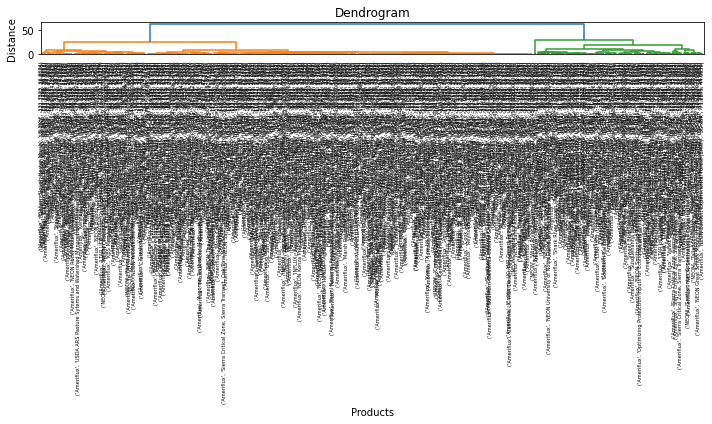

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate the linkage matrix
linkage_matrix = linkage(data_scaled, method='ward')

# Create a dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=data_transposed_numeric.columns, leaf_rotation=90)
plt.xlabel('Products')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.tight_layout()
plt.show()